In [302]:
import pandas as pd

In [303]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')


In [304]:
df = df.rename(columns= {
    'Recency(months)': 'months_since_last_donation',
    'Frequency(times)': 'number_of_donations',
    'Monetary (c.c.blood)': 'total_volume_donated',
    'Time': 'months_since_first_donation',
    'whether he/she donated blood in March 2007': 'made_donation_in_march_2007'
})

In [305]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),made_donation_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [306]:
# Check the data types of each column
print(df.dtypes)

Recency (months)               int64
Frequency (times)              int64
Monetary (c.c. blood)          int64
Time (months)                  int64
made_donation_in_march_2007    int64
dtype: object


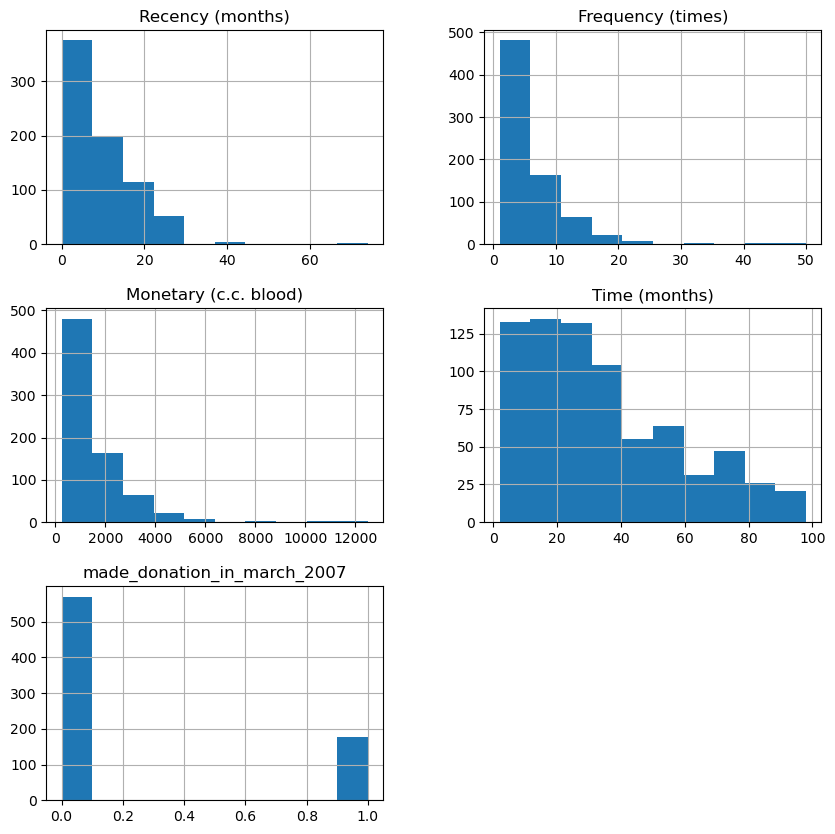

In [307]:
import matplotlib.pyplot as plt

# Plot the distribution of each variable
df.hist(bins=10, figsize=(10,10))
plt.show()


In [308]:
y = df['made_donation_in_march_2007']

In [309]:
# Get the names of the quantitative variables
quant_vars = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']

# Apply a log transformation to each quantitative variable
for var in quant_vars:
    # Add a small constant value to ensure all values are positive
    df[var] = df[var] + 1
    # Apply the log transformation
    df[f'log_{var}'] = np.log(df[var])

# Drop the original quantitative variables from the DataFrame
df = df.drop(columns=quant_vars)

In [310]:
df.head()

,made_donation_in_march_2007,log_Recency (months),log_Frequency (times),log_Monetary (c.c. blood),log_Time (months)
0,1,1.098612,3.931826,9.433564,4.595120
1,1,0.000000,2.639057,8.086718,3.367296
2,1,0.693147,2.833213,8.294300,3.583519
3,1,1.098612,3.044522,8.517393,3.828641
4,0,0.693147,3.218876,8.699681,4.356709


In [311]:
X =df

In [312]:
# Print the number of data points in each class
class_counts = df['made_donation_in_march_2007'].value_counts()
print(class_counts)


0    570
1    178
Name: made_donation_in_march_2007, dtype: int64


In [313]:
from sklearn.model_selection import train_test_split

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.25,
                                                   shuffle=True,
                                                   random_state=1)

In [315]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [316]:
# Get initial metrics estimated

# Using simple pandas value counts method
print(y_train.value_counts)

#Using sklearn accuracy score
import numpy as np
from sklearn.metrics import accuracy_score

majority_class = y_train.mode([0])
prediction = np.full(shape=y_train.shape,
                    fill_value=majority_class)

accuracy_score(y_train, prediction)

<bound method IndexOpsMixin.value_counts of 352    0
207    0
107    0
17     1
714    0
      ..
645    0
715    0
72     1
235    0
37     1
Name: made_donation_in_march_2007, Length: 561, dtype: int64>


0.7718360071301248

In [317]:
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

In [318]:
pipeline = make_pipeline(\
                        PolynomialFeatures(),
                        RobustScaler(),
                        SelectKBest(f_classif),
                        LogisticRegression( solver='lbfgs'))

In [319]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'selectkbest__k': [1, 2, 3, 4],
    'polynomialfeatures__degree': [1, 2, 3],
    'logisticregression__class_weight': [None, 'balanced'],
    'logisticregression__C': [.0001, .001, .01, .1, 10.0, 100.0, 1000.0]
}

gridsearch = GridSearchCV(pipeline, param_grid=param_grid,
                         cv=5, scoring='accuracy', verbose=1)

In [320]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: Runti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selecti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selecti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: R

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: R

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: Runti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selecti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selecti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selecti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: R

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: Runti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:11

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selecti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selecti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: R

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: Runti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selecti

/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  6 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ouafaekarmouda/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selecti

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('robustscaler', RobustScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                                   10.0, 100.0, 1000.0],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'polynomialfeatures__degree': [1, 2, 3],
                         'selectkbest__k': [1, 2, 3, 4]},
             scoring='accuracy', verbose=1)

In [321]:
gridsearch.best_score_

1.0

In [322]:
gridsearch.best_params_

{'logisticregression__C': 0.0001,
 'logisticregression__class_weight': 'balanced',
 'polynomialfeatures__degree': 1,
 'selectkbest__k': 1}

In [323]:

#Get the best model and check it against test data set.

# Predict with X_test features
y_pred = gridsearch.predict(X_test)

# Compare predictions to y_test labels
test_score = accuracy_score(y_test, y_pred)
print('Accuracy Score on test data set:', test_score)

Accuracy Score on test data set: 1.0


In [324]:
# Evaluate the performance of the model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00        50

    accuracy                           1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187

